# BS Classifier
- length of comments
- What factors are the best in predicting how whether a student put effort in
- specific words / frequency of words they use

In [1]:
import pandas as pd
import xlrd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords

## Load data

In [2]:
pd.set_option('display.max_rows', None)
comments = pd.read_excel('Comments.xlsx')

#Check what data looks like
comments.head()

,Comment,Speaker,"Tag (1 = good, 0 = bad)"
0,In the talk we had in lecture with Mr.Sweetnam...,Sweetnam,1
1,I have learned a lot from Mr. Sweetnam’s talk....,Sweetnam,1
2,"From Mr.Sweetnam's talk, I learnt how life wou...",Sweetnam,0
3,I enjoyed the speech Mr.Sweentam gave us on Tu...,Sweetnam,1
4,Mr. Sweetnam’s talk is about the statistics af...,Sweetnam,1


In [3]:
comments.tail()

,Comment,Speaker,"Tag (1 = good, 0 = bad)"
199,Sometimes we tend to ignore what we are too cl...,Kricorian,0
200,Here are the three strategies I learned from D...,Kricorian,1
201,It was so nice to have Dr. Kricorian as our sp...,Kricorian,1
202,I learned that patience is very essential in s...,Kricorian,1
203,The talk from Dr. Kricorian gives me lots of i...,Kricorian,1


In [4]:
comments.shape

(204, 3)

## Clean data

In [5]:
#Replace special characters in each row
count_row = comments.shape[0]
for i in range(count_row):
    comments.iloc[i,0] = (re.sub(r'([^\s\w]|_)+', '', str(comments.iloc[i, 0])))

In [6]:
#Make every word lowercase
comments['Comment'] = comments['Comment'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [7]:
#Remove stopwords
stop = stopwords.words('english')
comments['Comment'] = comments['Comment'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
comments

,Comment,Speaker,"Tag (1 = good, 0 = bad)"
0,talk lecture mrsweetnam learned work nbcuniver...,Sweetnam,1
1,learned lot mr sweetnams talk interesting get ...,Sweetnam,1
2,mrsweetnams talk learnt life would like gradua...,Sweetnam,0
3,enjoyed speech mrsweentam gave us tuesday clea...,Sweetnam,1
4,mr sweetnams talk statistics college experienc...,Sweetnam,1
5,quinn sweetnams talk insightful data science i...,Sweetnam,1
6,mr sweetnam relevant guest speaker far hasnt l...,Sweetnam,1
7,learned different types job field data science...,Sweetnam,0
8,many questions company ask statistician answer...,Sweetnam,0
9,mr sweetnam described main purposes job talked...,Sweetnam,1


In [8]:
#Add word_count column
comments['word_count'] = comments['Comment'].apply(lambda x: len(str(x).split(" ")))

# EDA with Processed Data

In [9]:
data = pd.read_csv('data_with_scores.csv')
data = data.drop(columns = ['Unnamed: 0'])
data

,Comment,Speaker,Tag,word_count,negative,neutral,positive,compound
0,In the talk we had in lecture with MrSweetnam ...,Sweetnam,1,110,0.000,1.000,0.000,0.0000
1,I have learned a lot from Mr Sweetnams talk It...,Sweetnam,1,229,0.000,1.000,0.000,0.0000
2,From MrSweetnams talk I learnt how life would ...,Sweetnam,0,77,0.000,1.000,0.000,0.0000
3,I enjoyed the speech MrSweentam gave us on Tue...,Sweetnam,1,108,0.000,0.784,0.216,0.5106
4,Mr Sweetnams talk is about the statistics afte...,Sweetnam,1,134,0.000,1.000,0.000,0.0000
5,Quinn Sweetnams talk was very insightful about...,Sweetnam,1,152,0.000,1.000,0.000,0.0000
6,Mr Sweetnam has been the most relevant guest s...,Sweetnam,1,156,0.000,1.000,0.000,0.0000
7,I learned that there are different types of jo...,Sweetnam,0,93,0.000,1.000,0.000,0.0000
8,There are so many questions that a company can...,Sweetnam,0,116,0.000,1.000,0.000,0.0000
9,Mr Sweetnam described the main purposes of his...,Sweetnam,1,116,0.000,1.000,0.000,0.0000


## Summary Statistics, Plots, Tables, Chi-square, T-test

In [10]:
data.corr()

,Tag,word_count,negative,neutral,positive,compound
Tag,1.000000,0.496247,-0.075667,0.066966,-0.034587,0.006511
word_count,0.496247,1.000000,-0.012785,0.105796,-0.110064,-0.098279
negative,-0.075667,-0.012785,1.000000,-0.424589,-0.050785,-0.518735
neutral,0.066966,0.105796,-0.424589,1.000000,-0.882655,-0.543422
positive,-0.034587,-0.110064,-0.050785,-0.882655,1.000000,0.868731
compound,0.006511,-0.098279,-0.518735,-0.543422,0.868731,1.000000


**There is a strong negative correlation (-0.883) between neutral and positive scores. Higher probabilities of neutral scores are generally associated with lower probabilities of positive scores. There is also a strong positive correlation (0.869) between positive and compound scores. Higher probabilities for positive scores are generally associated with higher probabilities of compound scores. This makes sense as higher compound scores signifiy positive sentiments.**

In [11]:
data.Speaker.value_counts().to_frame().rename(columns={"Speaker": "Number of Responses"})

,Number of Responses
Anderson,76
Sweetnam,68
Kricorian,60


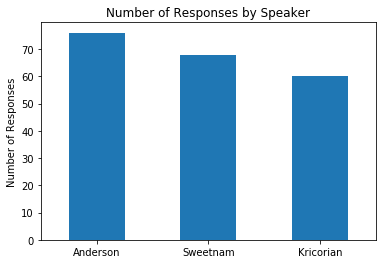

In [12]:
data.Speaker.value_counts().plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.title('Number of Responses by Speaker')
plt.ylabel('Number of Responses')
plt.show()

**Number of entries by speaker. Anderson had the most responses whereas Kricorian had the least (student absenses or nonresponses?)**

In [13]:
data["Tag"].value_counts().to_frame()

,Tag
1,128
0,76


**Distribution of tag scores. Almost twice as much good comments as bad comments.**

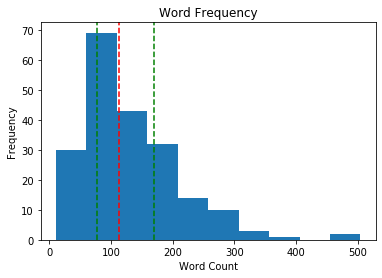

In [38]:
data.word_count.plot(kind = 'hist')
plt.title('Word Frequency')
plt.xlabel('Word Count')
plt.axvline(data.word_count.median(), color='r', linestyle='--')
plt.axvline(data.word_count.quantile(0.25), color='g', linestyle='--')
plt.axvline(data.word_count.quantile(0.75), color='g', linestyle='--')
plt.show()

**Word frequency is right skewed. The median words in all responses is 112.5**

In [15]:
data.groupby(['Speaker'])['word_count'].mean().sort_values(ascending = False).to_frame().rename(columns={"word_count": "Average word count"})

,Average word count
Speaker,
Kricorian,142.400000
Sweetnam,135.117647
Anderson,123.565789


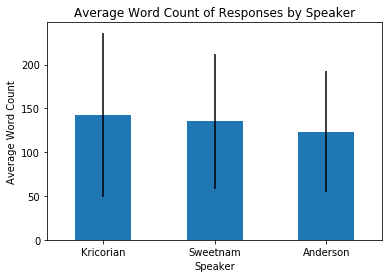

In [25]:
std = data.groupby(['Speaker'])['word_count'].std().sort_values(ascending = False)
data.groupby(['Speaker'])['word_count'].mean().sort_values(ascending = False).plot(kind = 'bar', yerr = std)

plt.xticks(rotation=0)
plt.ylabel('Average Word Count')
plt.title('Average Word Count of Responses by Speaker')
plt.show()

**Responses for Kricorian had the highest average number of words. This is in conjunction with how Kricorian had the least amount of responses.**

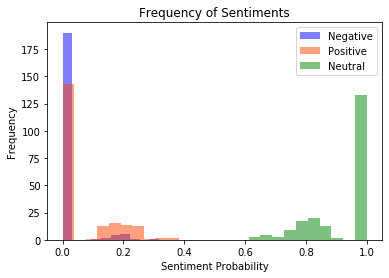

In [17]:
plt.hist(data.negative, alpha=0.5, label='Negative', color='b')
plt.hist(data.positive, alpha=0.5, label='Positive', color='orangered')
plt.hist(data.neutral, alpha=0.5, label='Neutral', color='g')
plt.title('Frequency of Sentiments')
plt.xlabel('Sentiment Probability')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

**Most comments were labeled as purely Neutral according to our sentiment analysis. Although the bars for Positive and Negative have the highest frequency of values, these all have probabilities of 0. The highest non-Neutral sentiment frequency is that of Positive responses, centering around 20% probability (which signifies an 80% Neutral probability). Very few comments are labeled as Negative.**

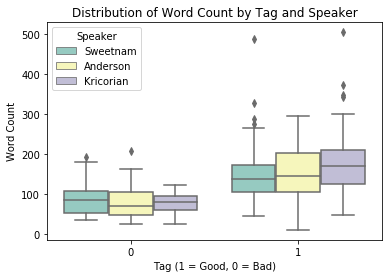

In [18]:
ax = sns.boxplot(x="Tag", y="word_count", hue="Speaker",
                 data=data, palette="Set3")
plt.title('Distribution of Word Count by Tag and Speaker')
plt.ylabel('Word Count')
plt.xlabel('Tag (1 = Good, 0 = Bad)')
plt.show()

**We can see that regardless of Speaker, comments tagged as good generally have higher word counts. The word count by Speaker are generally very similar regardless of Tag.**

## Statistical analysis used to answer the research questions

**The main statistical analysis that we used is Logistic Regression. We did this by building a Logistic Regression model in R with Tag as our binary response variable and Speaker, word_count, negative, neutral, and compound as our predictors. We excluded the predictor positive because it produced errors in our model and it is encompassed in the neutral and compound variables.**